In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

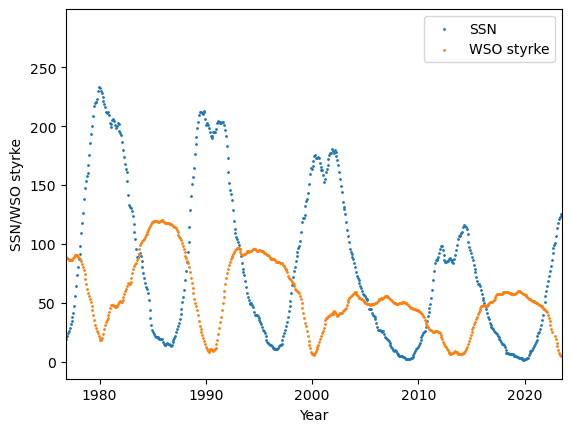

In [73]:
# Indlæs data

loc1 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\13-month smoothed monthly total sunspot number 1-1749 to now.csv"
loc2 = r"C:\Users\marcu\OneDrive\Documents\GitHub\Solpletter_projekt\Magnus carlsen\data\WSO_smoothed.csv"

column_names = ['Year', 'Year_fraction', 'Monthly_smoothed_sunspot_number', 'U1', 'U2', 'U3']
sunspot_raw_data = pd.read_csv(loc1, names=column_names, delimiter=';')
sunspot_raw_data = sunspot_raw_data.iloc[6:-6]

# Sunspot data
sunspot_date_fraction_arr = sunspot_raw_data['Year_fraction'].values.astype(float)
sunspot_number_arr = sunspot_raw_data['Monthly_smoothed_sunspot_number'].values.astype(float)

# WSO data
wso_raw_data = np.genfromtxt(loc2, delimiter=',', skip_header=1)

wso_date_fraction_arr = wso_raw_data[:, 0]
wso_number_arr = wso_raw_data[:, 1]

# Størrelse på punkterne i scatterplottet
ScatterSize = 1

# Plot data
plt.scatter(sunspot_date_fraction_arr, sunspot_number_arr, label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr, wso_number_arr, label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()

## Korrelationskoefficient over hele tidsrummet med WSO-data

### Normalisering

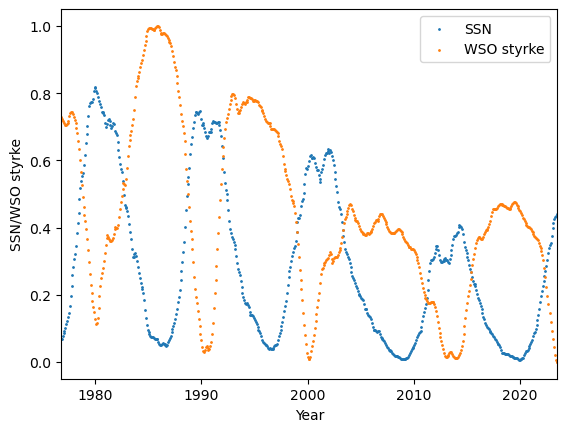

In [74]:
# Normaliser data med min-max normalisering til at være mellem 0 og 1
def min_max_normalization(data, a, b):
    return [a + (val - np.min(data))*(b - a) / (np.max(data) - np.min(data)) for val in data]

sunspot_number_arr_normalized = min_max_normalization(sunspot_number_arr, 0, 1)
wso_number_arr_normalized = min_max_normalization(wso_number_arr, 0, 1)

# Plot
plt.scatter(sunspot_date_fraction_arr, sunspot_number_arr_normalized, label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr, wso_number_arr_normalized, label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()


In [75]:
# Returnerer korrelationskoefficienten for to arrays
def correlation_coefficient(x_arr, y_arr):
    return np.cov(x_arr, y_arr)[0,1] / (np.std(x_arr) * np.std(y_arr))

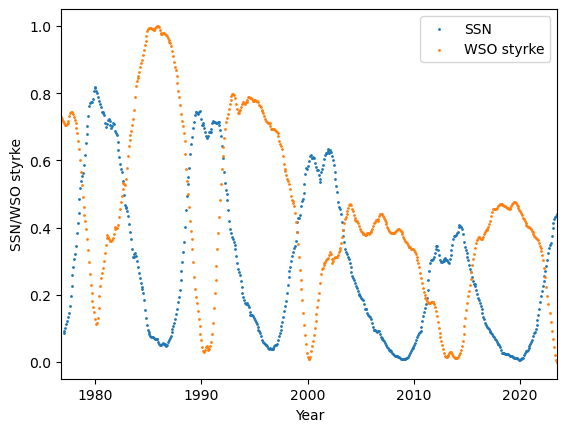

Korrelationskoefficienten mellem SSN og WSO styrke er: -0.4566512108224753


In [76]:
# Udregn korrelationskoefficienten
# Skær arrays til så de har samme længde
min_length = min(len(sunspot_number_arr_normalized), len(wso_number_arr_normalized))

# Plot
plt.scatter(sunspot_date_fraction_arr[-min_length:], sunspot_number_arr_normalized[-min_length:], label='SSN', s=ScatterSize)
plt.scatter(wso_date_fraction_arr[-min_length:], wso_number_arr_normalized[-min_length:], label='WSO styrke', s=ScatterSize)
plt.xlabel('Year')
plt.ylabel('SSN/WSO styrke')
plt.xlim(wso_date_fraction_arr[0], wso_date_fraction_arr[-1])
plt.legend()
plt.show()

corr_coeff = correlation_coefficient(sunspot_number_arr_normalized[-min_length:], wso_number_arr_normalized[-min_length:])
print('Korrelationskoefficienten mellem SSN og WSO styrke er:', corr_coeff)


## Korrelationskoefficient for hver enkelt cyklus